In [44]:
import pandas as pd

lp = pd.read_csv("hprc_105_len_poly_score.txt", sep='\t')
fst = pd.read_csv("result_fst.tsv", sep='\t')

lp.set_index(['chrom', 'start', 'end'], inplace=True)
fst.set_index(['chrom', 'start', 'end'], inplace=True)

fst['len_poly_score'] = lp['len_poly_score']
fst.head()

Unnamed: 0  is_ref   AC        AF  AC_EAS  AC_AMR  AC_AFR  \
chrom start end                                                                
chr1  16682 16774           0    True  161  0.856383      16      28      26   
            16774           1   False   27  0.143617       4       8       9   
      19275 19473           2    True  178  0.946809      16      28      26   
            19473           3   False   10  0.053191       0       2       7   
      20798 20893           4    True  146  0.776596      16      28      26   

                   AC_SAS       fst  len_poly_score  
chrom start end                                      
chr1  16682 16774      24  0.000000        1.904762  
            16774       6  0.003152        1.904762  
      19275 19473      24  0.000000        1.904762  
            19473       1  0.053089        1.904762  
      20798 20893      24  0.000000        1.904762

<Axes: xlabel='len_poly_score', ylabel='fst'>

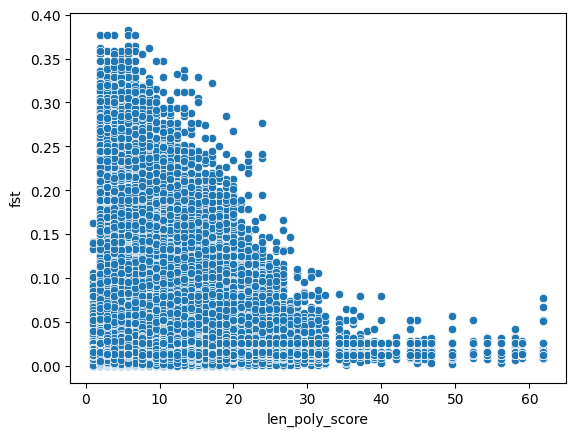

In [46]:
sb.scatterplot(data=fst.reset_index(), x="len_poly_score", y="fst")

In [ ]:
# I don't see any relationship between Fst and Length Polymorphism Score

In [47]:
# Candidate loci
keep = fst['fst'] >= 0.20
keep.sum()

7277

In [48]:
keep_lp = fst['len_poly_score'] >= 20
keep_lp.sum()

59428

In [54]:
fst[keep & keep_lp]

Unnamed: 0  is_ref  AC        AF  AC_EAS  AC_AMR  \
chrom start     end                                                           
chr11 33641542  33641664       989967   False  17  0.090426       0       0   
chr15 27730702  27730803      2026642   False  27  0.143617       0       0   
chr17 43225637  43225772      2590191    True  16  0.085106       0       0   
      43910454  43910533      2593422   False  14  0.074468      11       1   
chr18 70650326  70650405      2870073   False  18  0.095745       0       1   
chr19 11995719  11995813      2960311   False  20  0.106383       0       0   
chr2  112095090 112095237     3395793   False  10  0.053191       9       0   
chr21 24267055  24267124      3895774    True  24  0.127660       0       4   
chr3  138693906 138694023     4377871   False  12  0.063830      10       0   
chr4  149954933 149955027     4849355   False  16  0.085106       1       0   
chr7  4493818   4493893       5779919   False  19  0.101064       0       2   
      9220672   9220781       5795612   False  17  0.090426       0       0   
chr9  23113210  23113287      6555131    True  20  0.106383       0       2   
chrX  31822623  31822731      6878322   False  12  0.063830      10       1   

                           AC_AFR  AC_SAS       fst  len_poly_score  
chrom start     end                                                  
chr11 33641542  33641664       15       0  0.226767       21.904762  
chr15 27730702  27730803       20       2  0.267749       20.000000  
chr17 43225637  43225772       15       1  0.203989       20.000000  
      43910454  43910533        0       2  0.219170       21.904762  
chr18 70650326  70650405       17       0  0.236668       23.809524  
chr19 11995719  11995813       18       0  0.276923       23.809524  
chr2  112095090 112095237       1       0  0.213197       20.000000  
chr21 24267055  24267124       20       0  0.234723       20.000000  
chr3  138693906 138694023       0       1  0.241611       23.809524  
chr4  149954933 149955027      15       0  0.204701       20.000000  
chr7  4493818   4493893        16       0  0.200970       20.000000  
      9220672   9220781        15       0  0.226767       20.952381  
chr9  23113210  23113287       18       0  0.233575       21.904762  
chrX  31822623  31822731        0       0  0.241324       21.904762

In [49]:
# Alleles with a higher length polymorphism score and at least one 
(keep & keep_lp).sum()

14

In [51]:
interesting_loci = fst[keep & keep_lp].index

In [56]:
fst[fst.index.isin(interesting_loci)].reset_index().drop(columns=['Unnamed: 0']).to_csv("InterestingAlleles.txt", index=False, sep='\t')

Let's extract the locus ID for these sites. Then we can use that list to run e.g. the PCA notebook and the clustermap notebook

In [60]:
loci = pd.read_parquet("/Users/english/code/references/hprc_105.tdb/locus.pq")
loci.set_index(['chrom', 'start', 'end'], inplace=True)
view = loci[loci.index.isin(interesting_loci)]

lid = list(view["LocusID"])
print(lid)
view

In [68]:
# Let's get 14 random loci with an MAF by-length ≥0.5
subset = fst[fst['AF'].between(0.5, 0.95)].sample(14, random_state=122)
view = loci[loci.index.isin(subset.index)]

lid = list(view["LocusID"])
print(lid)
view

[49102, 55932, 58093, 169806, 204905, 215209, 341872, 522383, 527961, 575977, 627972, 652360, 872025, 875958]


LocusID
chrom start     end               
chr1  164636114 164636182    49102
      187012850 187012933    55932
      194154224 194154304    58093
chr12 17602918  17602981    169806
      123096979 123097084   204905
chr13 36073459  36073539    215209
chr17 30660762  30660857    341872
chr21 29799466  29799578    522383
      44446080  44446315    527961
chr3  107631519 107631579   575977
chr4  76756318  76756458    627972
      162775803 162775868   652360
chr9  11653779  11653869    872025
      25142315  25142458    875958

Okay, the PCA worked, maybe.

Test number 2 can now be, for the samples without ancestry, can we predict which super population they most likely belong to. We can use the clustermap stuff to see what is says overall. And then what do the 14 loci look like?

In [9]:
fst['max_column'] = fst[['AC_EAS', 'AC_AMR', 'AC_AFR', 'AC_SAS']].idxmax(axis=1)


In [10]:
fst['max_column'].value_counts()

max_column
AC_AMR    2722187
AC_AFR    2482900
AC_SAS    1072301
AC_EAS     815363
Name: count, dtype: int64

In [12]:
# For the high-fst alleles, what ancestry has the highest allele count
fst[keep]['max_column'].value_counts()

max_column
AC_AFR    6602
AC_EAS     583
AC_AMR      59
AC_SAS      33
Name: count, dtype: int64

In [13]:
# How many loci do these alleles cover
fst[keep][['chrom', 'start', 'end']].nunique()

chrom      24
start    7247
end      7247
dtype: int64

This means there are ~30 loci where more than one allele has a high fst.

<Axes: xlabel='AF', ylabel='fst'>

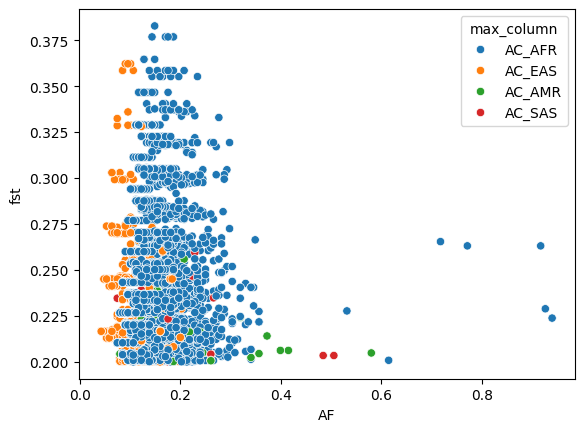

In [17]:
sb.scatterplot(data=fst[keep], x="AF", y="fst", hue='max_column')

In [19]:
lp.set_index(['chrom', 'start', 'end'], inplace=True)

In [21]:
m_keep = fst[keep].copy().set_index(['chrom', 'start', 'end'])

In [23]:
to_analyze = lp.index.isin(m_keep.index)

[None]

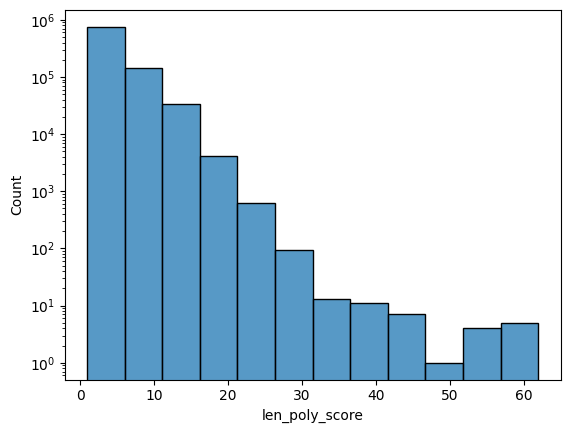

In [27]:
p = sb.histplot(data=lp, x="len_poly_score", binwidth=5)
p.set(yscale='log')

[None]

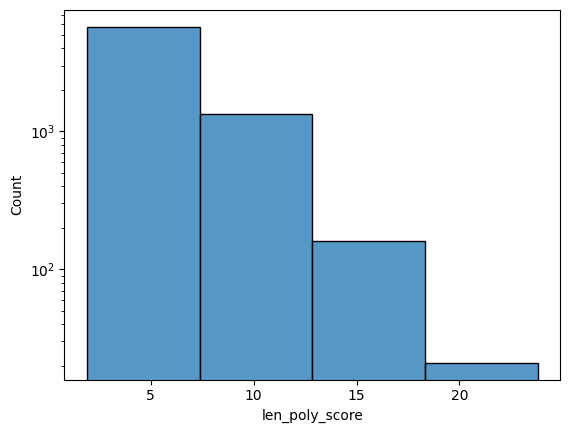

In [28]:
p = sb.histplot(data=lp[to_analyze], x="len_poly_score", binwidth=5)

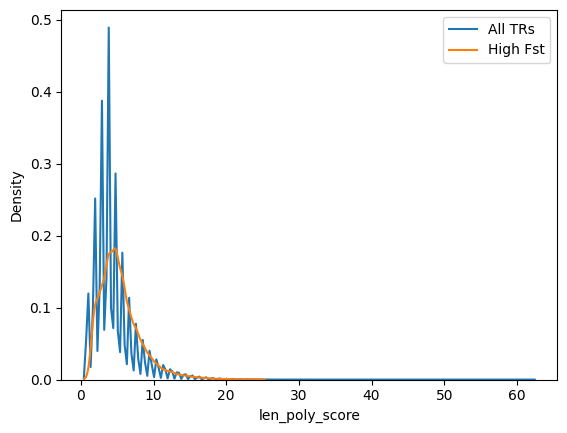

In [31]:
sb.kdeplot(data=lp, x='len_poly_score', label="All TRs")
sb.kdeplot(data=lp[to_analyze], x='len_poly_score', label="High Fst")
import matplotlib.pyplot as plt
plt.legend()

In [36]:
fst.set_index(['chrom', 'start', 'end'], inplace=True)



In [39]:
interesting = lp[lp['len_poly_score'] >= 40]
keep2 = fst.index.isin(interesting.index)

<Axes: xlabel='AF', ylabel='fst'>

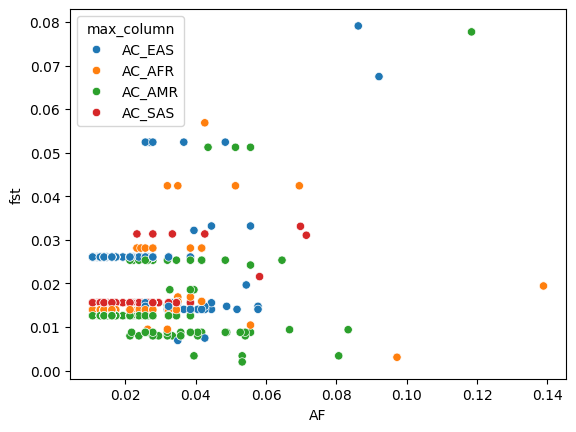

In [41]:
# Let's look at the opposite, what are the high length polymorphism scores' Fst values.
sb.scatterplot(data=fst[keep2].reset_index(), x="AF", y="fst", hue='max_column')

In [42]:
fst[keep2]

Unnamed: 0  is_ref  AC        AF  AC_EAS  AC_AMR  \
chrom start     end                                                           
chr1  121779584 121781105      305413   False   3  0.057692       1       0   
                121781105      305414   False   3  0.057692       1       1   
                121781105      305415   False   2  0.038462       0       0   
                121781105      305416   False   2  0.038462       1       0   
                121781105      305417   False   2  0.038462       0       0   
...                               ...     ...  ..       ...     ...     ...   
chrX  62798144  62821753      6923766   False   1  0.016129       0       1   
                62821753      6923767   False   1  0.016129       0       1   
                62821753      6923768   False   1  0.016129       0       1   
                62821753      6923769   False   1  0.016129       0       1   
                62821753      6923770   False   1  0.016129       1       0   

                           AC_AFR  AC_SAS       fst max_column  
chrom start     end                                             
chr1  121779584 121781105       1       0  0.014759     AC_EAS  
                121781105       0       0  0.014065     AC_EAS  
                121781105       1       0  0.013986     AC_AFR  
                121781105       0       0  0.026070     AC_EAS  
                121781105       1       0  0.013986     AC_AFR  
...                           ...     ...       ...        ...  
chrX  62798144  62821753        0       0  0.012605     AC_AMR  
                62821753        0       0  0.012605     AC_AMR  
                62821753        0       0  0.012605     AC_AMR  
                62821753        0       0  0.012605     AC_AMR  
                62821753        0       0  0.026070     AC_EAS  

[1031 rows x 10 columns]

<Axes: xlabel='AC', ylabel='Count'>

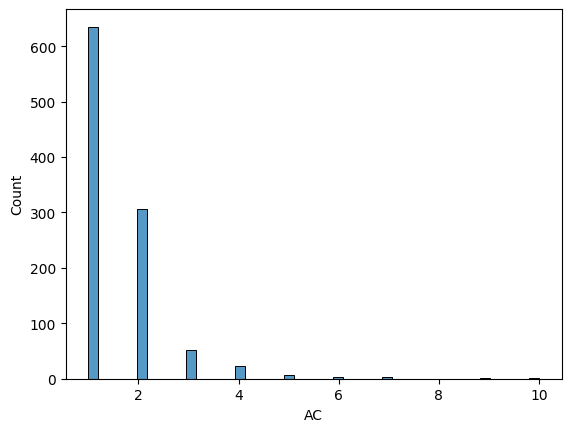

In [43]:
sb.histplot(data=fst[keep2], x='AC')